**Import Libraries and Load cloeaned data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/churn_cleaned.csv")

**Create Tenure Buckets**

In [2]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 60, 100],
    labels=['0-1 year', '1-2 years', '2-4 years', '4-5 years', '5+ years']
)

In [ ]:
#Churn Rate by Tenure Group
tenure_churn = (
    df.groupby('tenure_group')['Churn']
    .value_counts(normalize=True)
    .rename('rate')
    .reset_index()
)

tenure_churn = tenure_churn[tenure_churn['Churn'] == 'Yes']

C:\Users\LOQ\AppData\Local\Temp\ipykernel_21748\2811989261.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_group')['Churn']


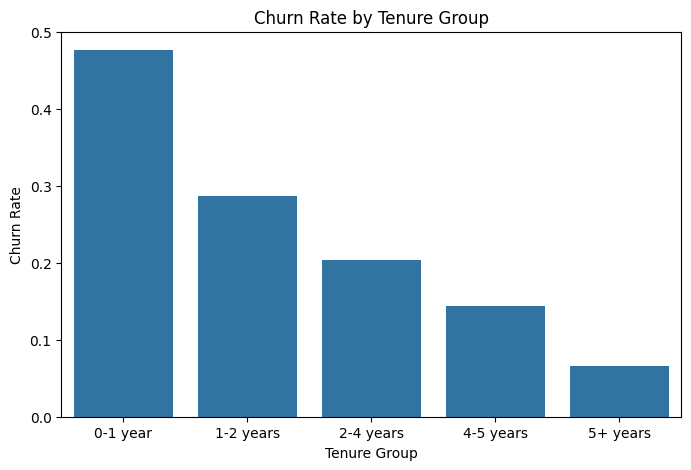

In [5]:
#plot
plt.figure(figsize=(8,5))
sns.barplot(data=tenure_churn, x='tenure_group', y='rate')
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group")
plt.show()


Business Insight : *Customers with tenure less than 1 year show the highest churn rate, which steadily declines as tenure increases.*

In [7]:
#Churn by Contract Type
contract_churn = (
    df.groupby('Contract')['Churn']
    .value_counts(normalize=True)
    .rename('rate')
    .reset_index()
)

contract_churn = contract_churn[contract_churn['Churn'] == 'Yes']

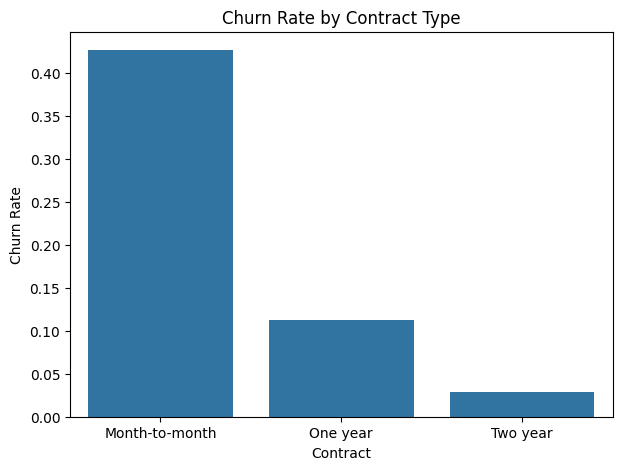

In [8]:
plt.figure(figsize=(7,5))
sns.barplot(data=contract_churn, x='Contract', y='rate')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()

Business Insight : *Month-to-month customers churn significantly more than customers on long-term contracts.*

In [11]:
#Churn by Payment Method
payment_churn = (
    df.groupby('PaymentMethod')['Churn']
    .value_counts(normalize=True)
    .rename('rate')
    .reset_index()
)

payment_churn = payment_churn[payment_churn['Churn'] == 'Yes']

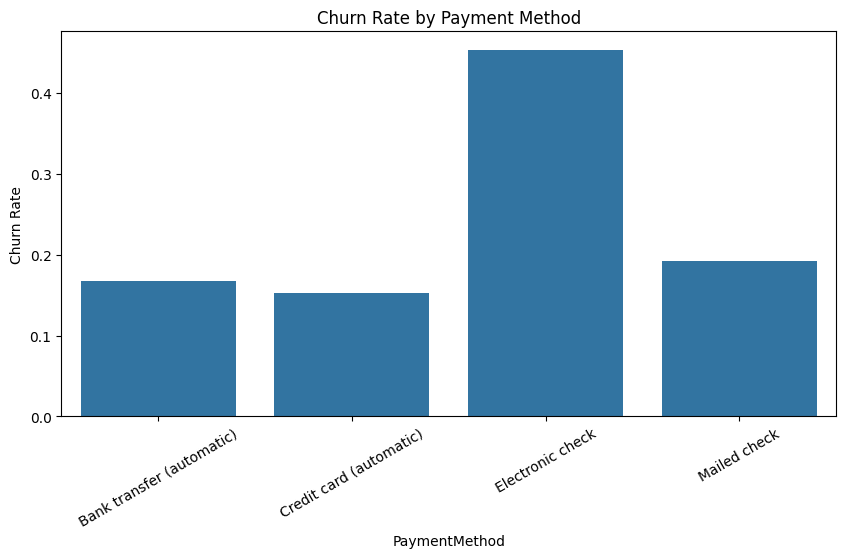

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=payment_churn, x='PaymentMethod', y='rate')
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=30)
plt.ylabel("Churn Rate")
plt.show()

Business Insight : *Customers using electronic check show higher churn compared to automatic payment methods.*

**Correlation Heatmap**

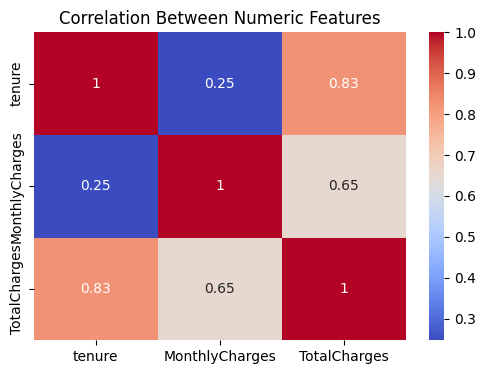

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Between Numeric Features")
plt.show()

**Save EDA-Ready Dataset**

In [16]:
df.to_csv("../data/processed/churn_eda_ready.csv", index=False)